In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import re

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

all_tables = pd.read_html(StringIO(str(soup)))

for table in all_tables:
    if table.columns[0].startswith("Tesla Quarterly Revenue"):
        tesla_revenue = table
        break

tesla_revenue = tesla_revenue.rename(
    columns={tesla_revenue.columns[0]: "Date", tesla_revenue.columns[1]: "Revenue"}
)[["Date", "Revenue"]]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].notna()]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "-"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].apply(lambda x: int(re.sub(r"[$,]", "", str(x))))
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue = tesla_revenue.sort_values("Date").reset_index(drop=True)

desired_indices = [41, 42, 43, 45, 46]

display_df = tesla_revenue.loc[desired_indices]
display_df.index = desired_indices 

print(display_df)


          Date  Revenue
41  2010-09-30       31
42  2010-06-30       28
43  2010-03-31       21
45  2009-09-30       46
46  2009-06-30       27


In [20]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import re

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

all_tables = pd.read_html(StringIO(str(soup)))

gme_revenue = None
for table in all_tables:
    if table.columns[0].startswith("GameStop Quarterly Revenue"):
        gme_revenue = table
        break
gme_revenue = gme_revenue.iloc[:, :2]
gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].apply(
    lambda x: int(re.sub(r"[$,]", "", str(x))) if pd.notnull(x) and str(x) != '-' else None
)

gme_revenue = gme_revenue.dropna(subset=["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])


gme_revenue = gme_revenue.sort_values("Date").reset_index(drop=True)

print(gme_revenue.tail())


          Date  Revenue
59  2006-01-31     1667
60  2005-10-31      534
61  2005-07-31      416
62  2005-04-30      475
63  2005-01-31      709


In [22]:
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
# Already done for revenue above


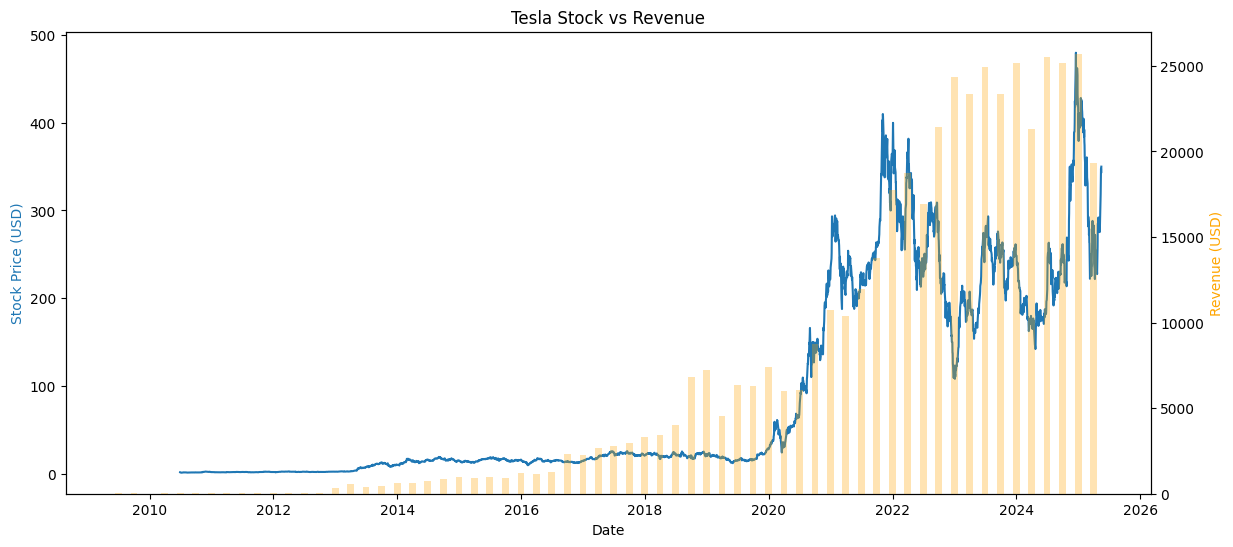

KeyError: 'Date'

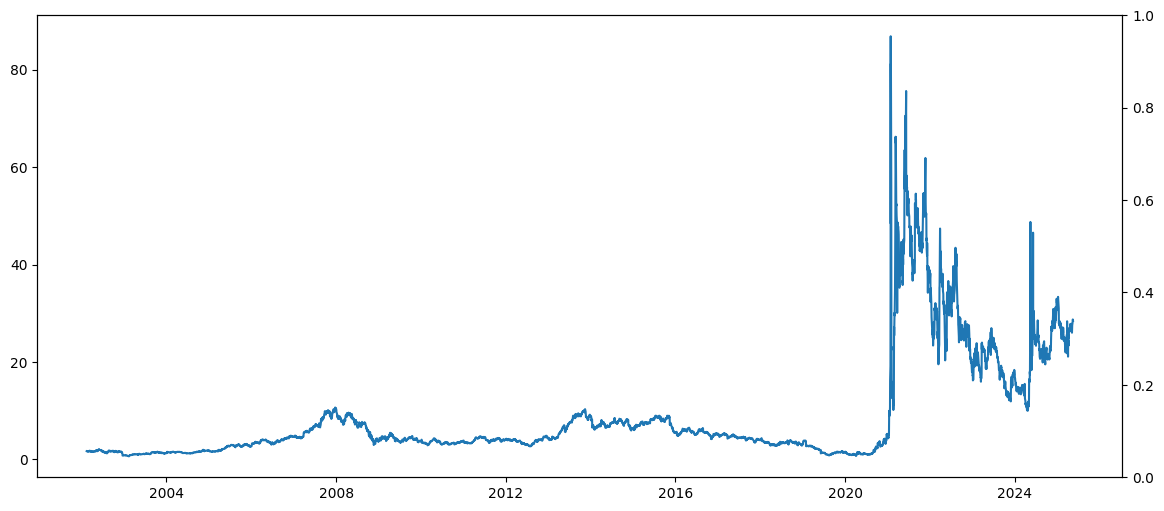

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import re

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract all tables
all_tables = pd.read_html(StringIO(str(soup)))

# Find the correct table by header
gme_revenue = None
for table in all_tables:
    if table.columns[0].startswith("GameStop Quarterly Revenue"):
        gme_revenue = table
        break

# Only keep the first two columns (Date and Revenue)
gme_revenue = gme_revenue.iloc[:, :2]
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column: remove $ and commas, convert to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].apply(
    lambda x: int(re.sub(r"[$,]", "", str(x))) if pd.notnull(x) and str(x) != '-' else None
)

# Drop rows with None in Revenue
gme_revenue = gme_revenue.dropna(subset=["Revenue"])

# Convert Date to datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Sort by Date ascending
gme_revenue = gme_revenue.sort_values("Date").reset_index(drop=True)

# Display last 5 rows for rubric screenshot
print(gme_revenue.tail())

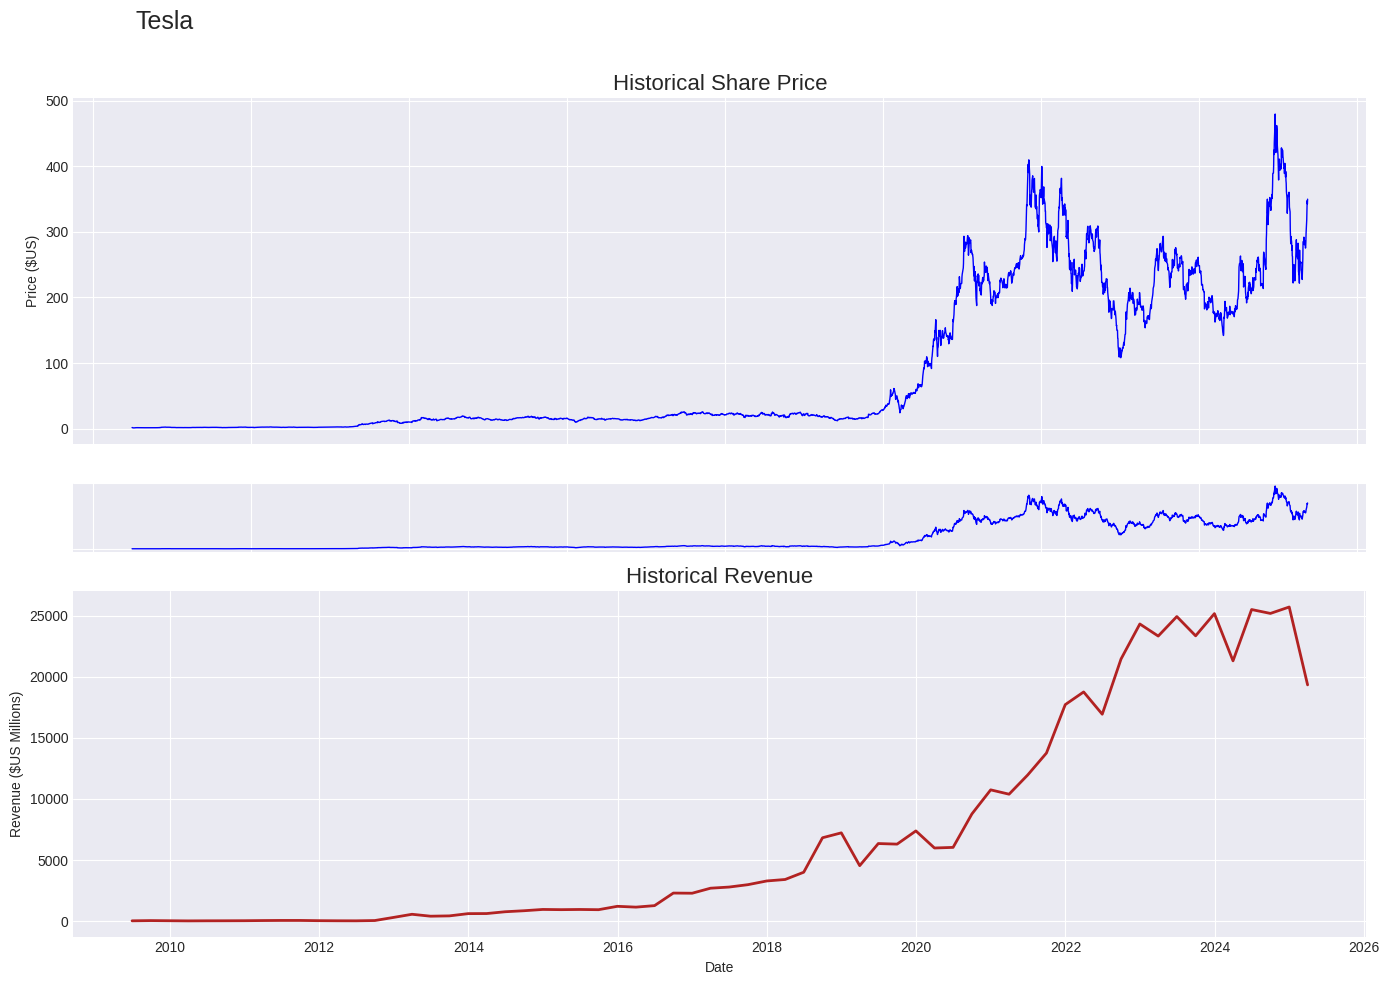

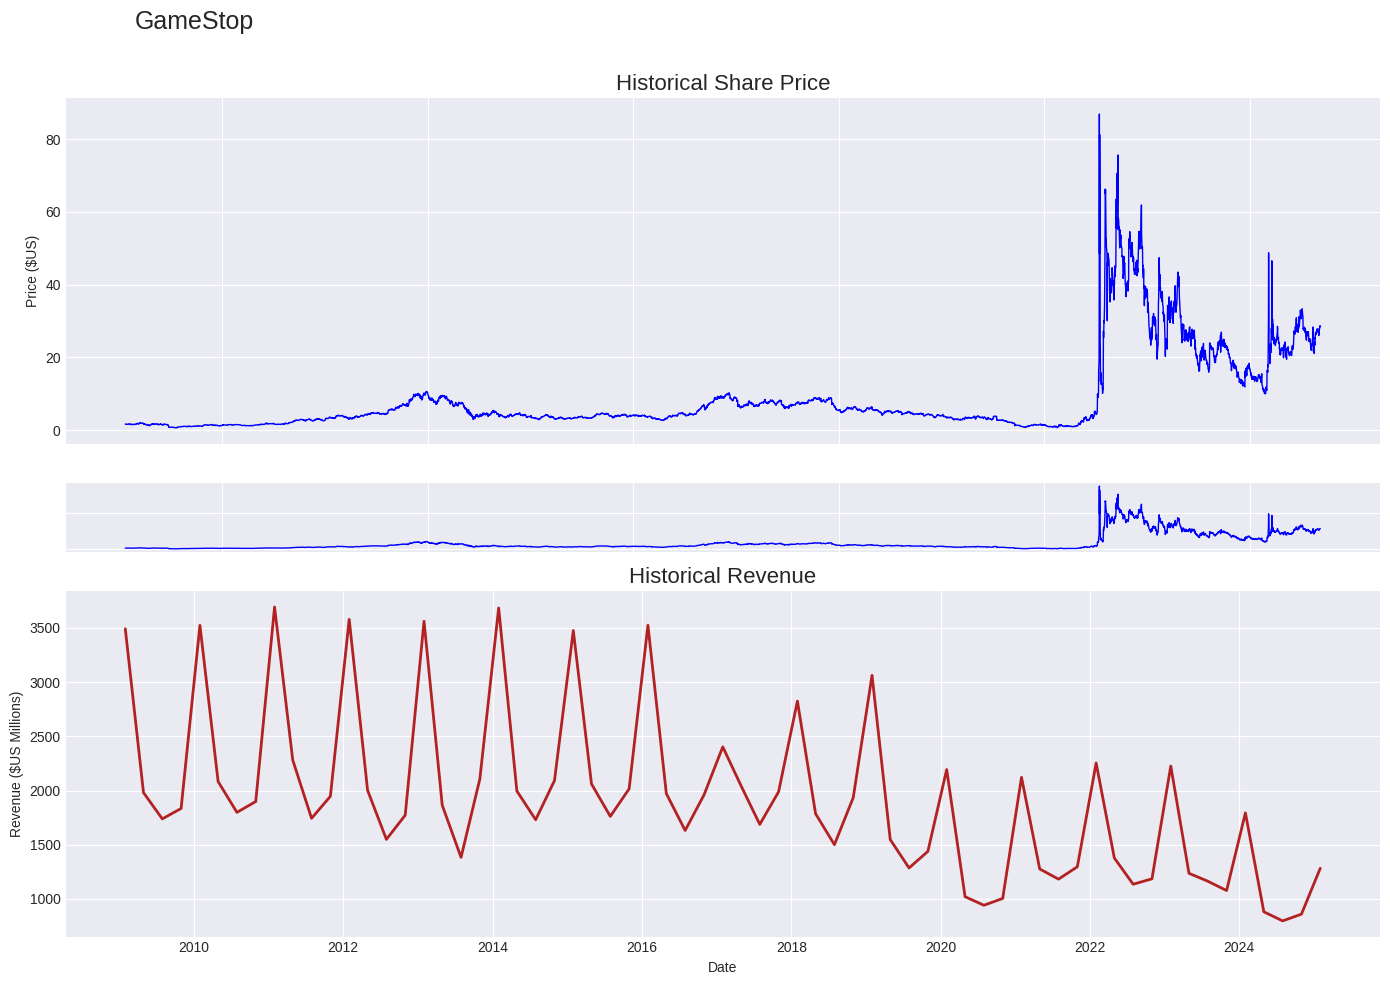

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
from io import StringIO

# --- Tesla Stock Data ---
tesla_data = yf.Ticker("TSLA").history(period="max").reset_index()
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# --- Tesla Revenue Data ---
html_tesla = '''
|Date|Revenue|
|--|--|
|2025-03-31|$19,335|
|2024-12-31|$25,707|
|2024-09-30|$25,182|
|2024-06-30|$25,500|
|2024-03-31|$21,301|
|2023-12-31|$25,167|
|2023-09-30|$23,350|
|2023-06-30|$24,927|
|2023-03-31|$23,329|
|2022-12-31|$24,318|
|2022-09-30|$21,454|
|2022-06-30|$16,934|
|2022-03-31|$18,756|
|2021-12-31|$17,719|
|2021-09-30|$13,757|
|2021-06-30|$11,958|
|2021-03-31|$10,389|
|2020-12-31|$10,744|
|2020-09-30|$8,771|
|2020-06-30|$6,036|
|2020-03-31|$5,985|
|2019-12-31|$7,384|
|2019-09-30|$6,303|
|2019-06-30|$6,350|
|2019-03-31|$4,541|
|2018-12-31|$7,226|
|2018-09-30|$6,824|
|2018-06-30|$4,002|
|2018-03-31|$3,409|
|2017-12-31|$3,288|
|2017-09-30|$2,985|
|2017-06-30|$2,790|
|2017-03-31|$2,696|
|2016-12-31|$2,285|
|2016-09-30|$2,298|
|2016-06-30|$1,270|
|2016-03-31|$1,147|
|2015-12-31|$1,214|
|2015-09-30|$937|
|2015-06-30|$955|
|2015-03-31|$940|
|2014-12-31|$957|
|2014-09-30|$852|
|2014-06-30|$769|
|2014-03-31|$621|
|2013-12-31|$615|
|2013-09-30|$431|
|2013-06-30|$405|
|2013-03-31|$562|
|2012-12-31|$306|
|2012-09-30|$50|
|2012-06-30|$27|
|2012-03-31|$30|
|2011-12-31|$39|
|2011-09-30|$58|
|2011-06-30|$58|
|2011-03-31|$49|
|2010-12-31|$36|
|2010-09-30|$31|
|2010-06-30|$28|
|2010-03-31|$21|
|2009-12-31|--|
|2009-09-30|$46|
|2009-06-30|$27|
'''
# Parse and clean Tesla revenue
revenue_df = pd.read_csv(StringIO(html_tesla), sep='|', skipinitialspace=True, skiprows=1, engine='python')
revenue_df = revenue_df[revenue_df['Revenue'].notnull() & (revenue_df['Revenue'] != '--') & (revenue_df['Revenue'] != "")]
revenue_df['Revenue'] = revenue_df['Revenue'].apply(lambda x: int(re.sub(r'[$,]', '', str(x))))
revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
revenue_df = revenue_df.sort_values('Date').reset_index(drop=True)
tesla_revenue = revenue_df

# --- GameStop Stock Data ---
gme_data = yf.Ticker("GME").history(period="max").reset_index()
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# --- GameStop Revenue Data ---
html_gme = '''
|Date|Revenue|
|--|--|
|2025-01-31|$1,283|
|2024-10-31|$860|
|2024-07-31|$798|
|2024-04-30|$882|
|2024-01-31|$1,794|
|2023-10-31|$1,078|
|2023-07-31|$1,164|
|2023-04-30|$1,237|
|2023-01-31|$2,226|
|2022-10-31|$1,186|
|2022-07-31|$1,136|
|2022-04-30|$1,378|
|2022-01-31|$2,254|
|2021-10-31|$1,297|
|2021-07-31|$1,183|
|2021-04-30|$1,277|
|2021-01-31|$2,122|
|2020-10-31|$1,005|
|2020-07-31|$942|
|2020-04-30|$1,021|
|2020-01-31|$2,194|
|2019-10-31|$1,439|
|2019-07-31|$1,286|
|2019-04-30|$1,548|
|2019-01-31|$3,063|
|2018-10-31|$1,935|
|2018-07-31|$1,501|
|2018-04-30|$1,786|
|2018-01-31|$2,825|
|2017-10-31|$1,989|
|2017-07-31|$1,688|
|2017-04-30|$2,046|
|2017-01-31|$2,403|
|2016-10-31|$1,959|
|2016-07-31|$1,632|
|2016-04-30|$1,972|
|2016-01-31|$3,525|
|2015-10-31|$2,016|
|2015-07-31|$1,762|
|2015-04-30|$2,061|
|2015-01-31|$3,476|
|2014-10-31|$2,092|
|2014-07-31|$1,731|
|2014-04-30|$1,996|
|2014-01-31|$3,684|
|2013-10-31|$2,107|
|2013-07-31|$1,384|
|2013-04-30|$1,865|
|2013-01-31|$3,562|
|2012-10-31|$1,773|
|2012-07-31|$1,550|
|2012-04-30|$2,002|
|2012-01-31|$3,579|
|2011-10-31|$1,947|
|2011-07-31|$1,744|
|2011-04-30|$2,281|
|2011-01-31|$3,693|
|2010-10-31|$1,899|
|2010-07-31|$1,799|
|2010-04-30|$2,083|
|2010-01-31|$3,524|
|2009-10-31|$1,835|
|2009-07-31|$1,739|
|2009-04-30|$1,981|
|2009-01-31|$3,492|
'''
revenue_df_gme = pd.read_csv(StringIO(html_gme), sep='|', skipinitialspace=True, skiprows=1, engine='python')
revenue_df_gme = revenue_df_gme[revenue_df_gme['Revenue'].notnull() & (revenue_df_gme['Revenue'] != '--') & (revenue_df_gme['Revenue'] != "")]
revenue_df_gme['Revenue'] = revenue_df_gme['Revenue'].apply(lambda x: int(re.sub(r'[$,]', '', str(x))))
revenue_df_gme['Date'] = pd.to_datetime(revenue_df_gme['Date'])
revenue_df_gme = revenue_df_gme.sort_values('Date').reset_index(drop=True)
gme_revenue = revenue_df_gme

# --- Plotting Function ---
def plot_dashboard(stock_data, revenue_data, company_name):
    plt.style.use('seaborn-v0_8-darkgrid')
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.2, 1])

    # Top: Share Price
    ax0 = plt.subplot(gs[0])
    ax0.plot(stock_data['Date'], stock_data['Close'], color='blue', linewidth=1)
    ax0.set_title("Historical Share Price", fontsize=16)
    ax0.set_ylabel("Price ($US)")
    ax0.set_xticklabels([])

    # Middle: Range Slider (duplicate price plot for effect)
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', linewidth=1)
    ax1.set_ylabel("")
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])

    # Bottom: Revenue
    ax2 = plt.subplot(gs[2])
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='firebrick', linewidth=2)
    ax2.set_title("Historical Revenue", fontsize=16)
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue ($US Millions)")


    fig.suptitle(company_name, fontsize=18, x=0.1, y=0.98, ha='left')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# --- Plot Tesla dashboard ---
plot_dashboard(tesla_data, tesla_revenue, "Tesla")

# --- Plot GameStop dashboard ---
plot_dashboard(gme_data, gme_revenue, "GameStop")
